<a href="https://colab.research.google.com/github/ShubhG20/TE-Seminar/blob/master/ProjectDMWFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

# **Data Extraction**

In [ ]:
# Kaggle -----> drive -----> colab ----> csv
file_path_full_training_set = 'drive/My Drive/nsl-kdd/KDDTrain+.txt'
file_path_test = 'drive/My Drive/nsl-kdd/KDDTest+.txt' 
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [ ]:
# add columns
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


# **Data Profiling**

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.apply(lambda x: sum(x.isnull()))

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
df.apply(lambda x: len(x.unique()))

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(df[col].value_counts())


Frequency of Categories for variable protocol_type
tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

Frequency of Categories for variable service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
harvest          2
http_8001        2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64

Frequency of Categories for variable flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

Frequency of Categories for variable attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_pass

In [ ]:
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


# **Data transformations**

In [ ]:
# normal:0 all-attacks:1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


# **Visualization**

In [ ]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs  

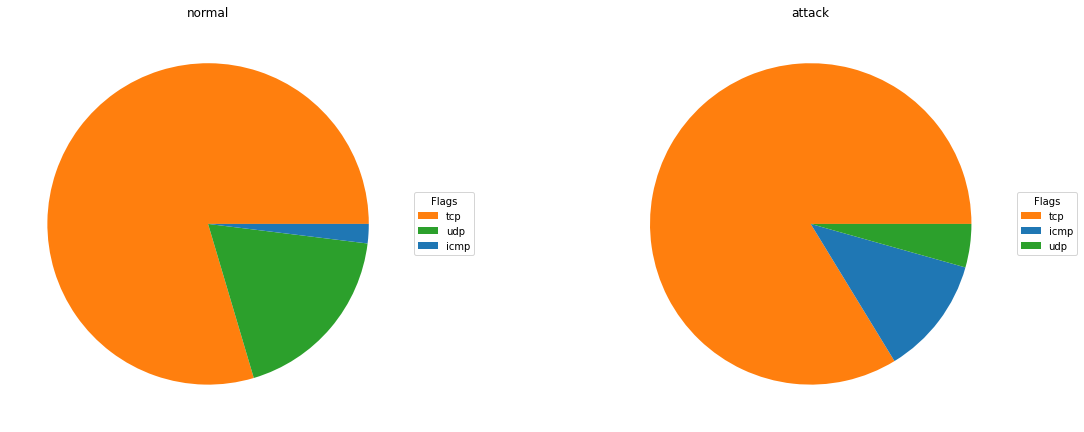

In [ ]:
# get a series with the count of each protcol for attack and normal traffic
normal_protocol = df.loc[df.attack_flag == 0].protocol_type.value_counts()
attack_protocol = df.loc[df.attack_flag == 1].protocol_type.value_counts()

# create the charts
flag_axs = bake_pies([normal_protocol, attack_protocol], ['normal','attack'])        
plt.show()

TCP - Transmission control protocol.


UDP - user datagram protocol.


ICMP - internet control message protocol.

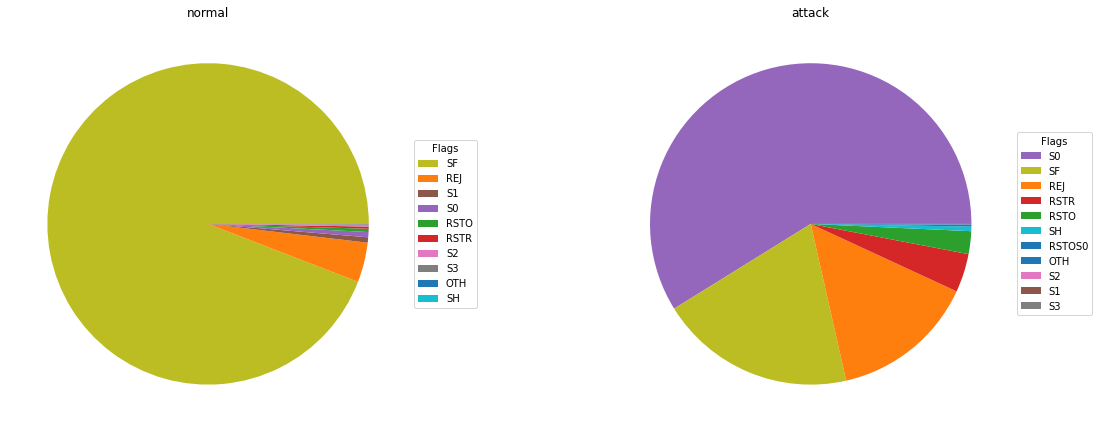

In [ ]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

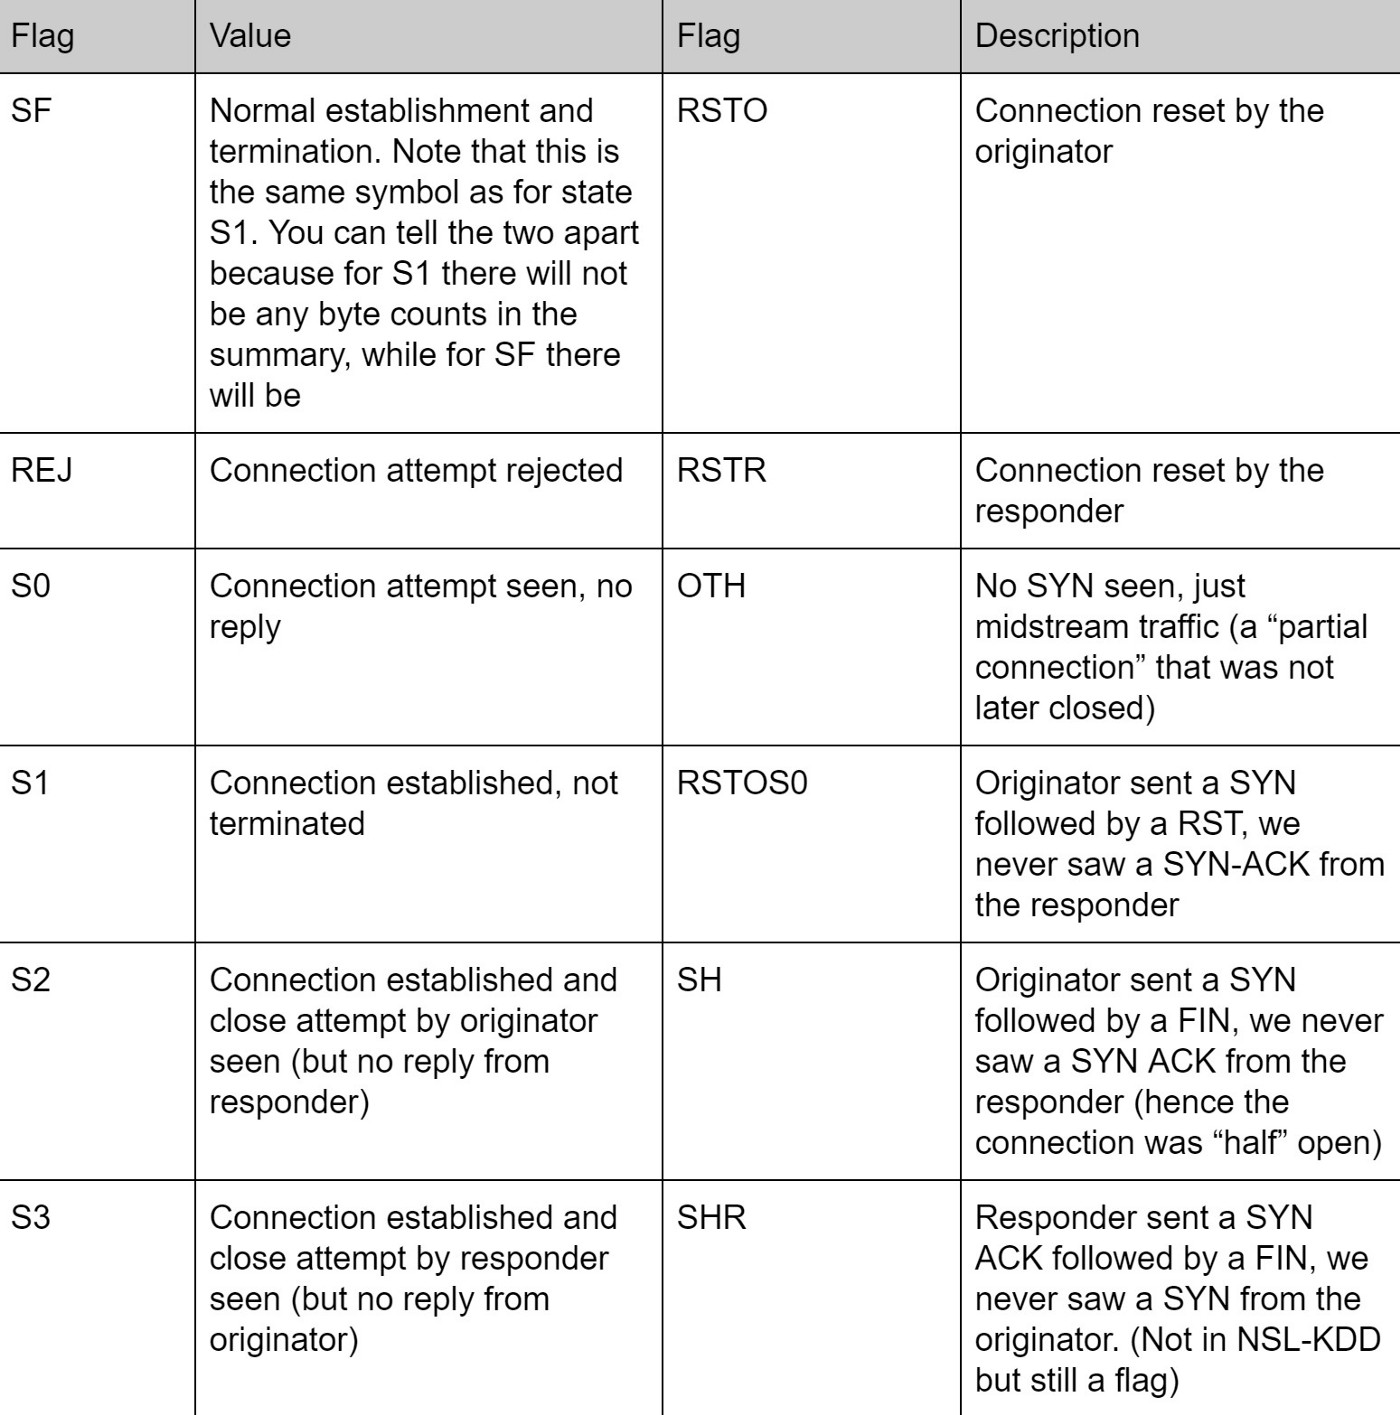

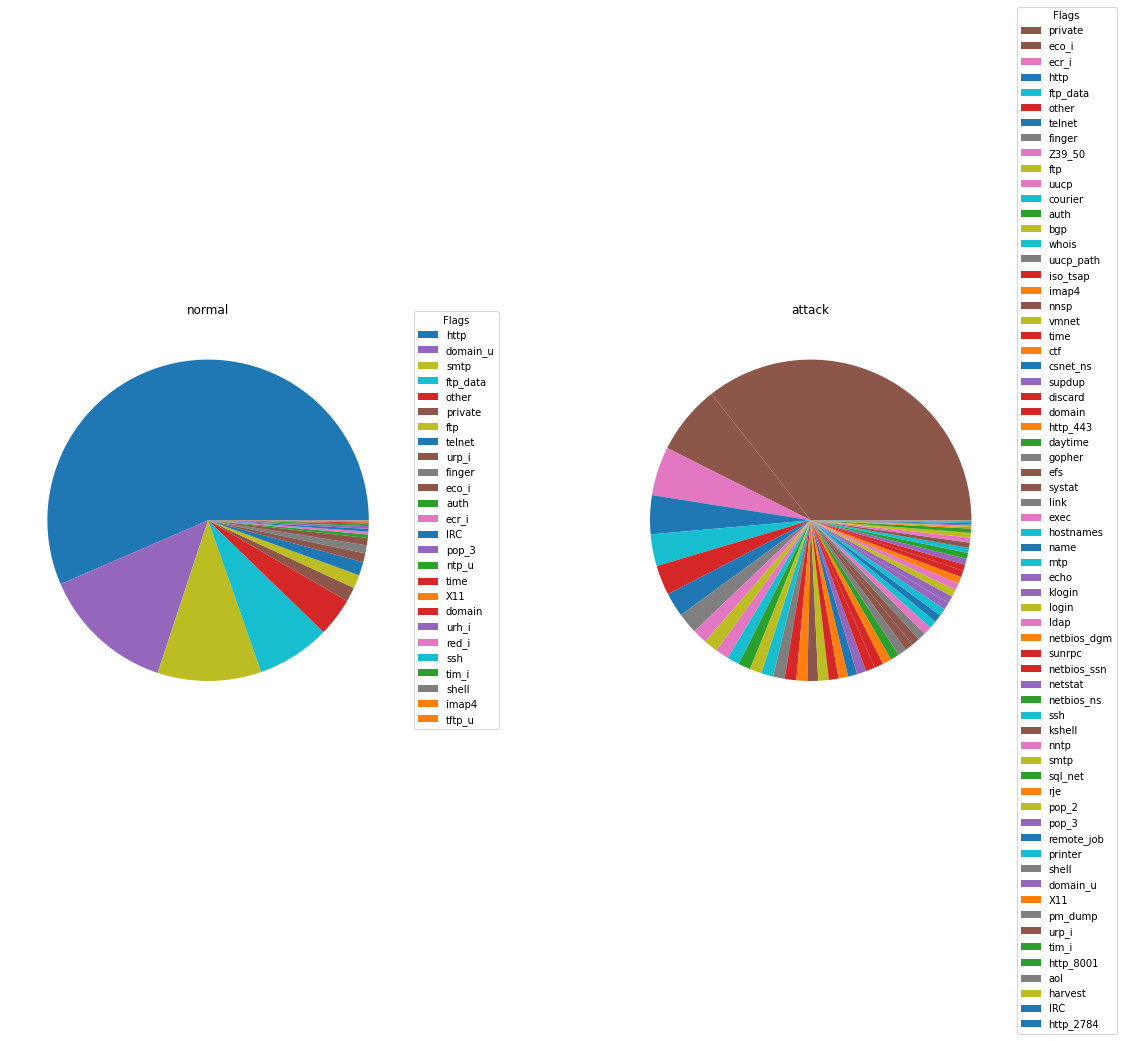

In [ ]:
# get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()

# **Feature engineering**

In [ ]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
x_train = encoded.join(df[numeric_features])
x_test = test_final.join(test_df[numeric_features])

In [ ]:
y_train = df['attack_flag']
y_test = test_df['attack_flag']

# **Model Selection**

In [ ]:
from sklearn.model_selection import cross_validate
model = RandomForestClassifier()

cv = cross_validate(model, x_train, y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.99341139 0.9929748  0.99384774 0.99372867 0.99349051]
0.9934906216862129


In [ ]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()

cv = cross_validate(model, x_train, y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.40361183 0.40587418 0.47237437 0.41402715 0.39660237]
0.41849797978876613


In [ ]:
from sklearn.model_selection import cross_validate
model = KNeighborsClassifier()

cv = cross_validate(model, x_train, y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.99198254 0.99162532 0.99245852 0.99083115 0.99214099]
0.991807703359064


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

cv = cross_validate(model, x_train, y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.99321294 0.99293511 0.99376836 0.99349051 0.99309359]
0.9933001020239324


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

cv = cross_validate(model, x_train, y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())


# **Supporting functions** 

In [ ]:
def bool_attack(x):
    if(x != "normal"):
        return "attack"
    else:
        return "normal"

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==1 and y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==0 and y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN) 

def convert_bool(x):
    if(x == "attack"):
        return 1
    else:
        return 0

In [ ]:
def cal_fpr_acc(TP,FP,TN,FN):
    acc = (TP+TN)/(TP+TN+FP+FN)
    fpr = (FP)/(FP+TN)
    tpr = (TP)/(FP+TN)
    
    return fpr, acc, tpr

In [ ]:
from sklearn import metrics as mt

def aucval(y_test,pred_out):
  fpr, tpr, _ = mt.roc_curve(np.array(y_test),np.array(pred_out))
  auc = mt.roc_auc_score(np.array(y_test),np.array(pred_out))
  return auc

In [ ]:
columns = ['model','fpr','acc','tpr','auc','TP','FP','TN','FN']
classifier_results_df = pd.DataFrame(columns= columns)
row_index = 0

# **Model Fitting**

## **Random forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
y_score = rf_clf.fit(x_train,y_train)

rf_pred = rf_clf.predict(x_train)
rf_conf = rf_clf.predict_proba(x_train)

In [ ]:
## for the training datataset
params = list(perf_measure(np.array(y_train),np.array(rf_pred))) #pred_out --> actual result
print(params)
fpr,acc,tpr = cal_fpr_acc(params[0],params[1],params[2],params[3])
# 
auc = aucval(y_train,rf_pred)
print(fpr,acc,tpr,auc)

[58397, 483, 66859, 233]
0.007172344153722788 0.9943161972501826 0.8671705622048648 0.9944267905702476


In [ ]:
## for the testing datataset
y_pred_ts = rf_clf.predict(x_test)
params = list(perf_measure(np.array(y_test),np.array(y_pred_ts))) #pred_out --> actual result
print(params)
fpr,acc,tpr = cal_fpr_acc(params[0],params[1],params[2],params[3])


rf_fpr, rf_tpr, _ = mt.roc_curve(np.array(y_test),np.array(y_pred_ts))

# 
auc = aucval(y_test,y_pred_ts)
print(fpr,acc,tpr,auc)
classifier_results_df.loc[row_index]= ['RF'] + [fpr] + [acc] + [tpr] + [auc] + [params[0]] + [params[1]] + [params[2]] + [params[3]]
row_index += 1

[9266, 883, 8828, 3566]
0.09092781381938009 0.8026438362241051 0.9541756770672434 0.8155865918434272


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train) 
y_pred = neigh.predict(x_train)
y_pred_ts = neigh.predict(x_test)

In [ ]:
# for the training datataset
params = list(perf_measure(np.array(y_train),np.array(y_pred))) #pred_out --> actual result
print(params)
fpr,acc,tpr = cal_fpr_acc(params[0],params[1],params[2],params[3])
print(fpr,acc,tpr)

[58235, 576, 66766, 395]
0.008553354518725312 0.9922919378909599 0.8647649312464732


In [ ]:
# for the testing datataset
params = list(perf_measure(np.array(y_test),np.array(y_pred_ts))) #pred_out --> actual result
print(params)
fpr,acc,tpr = cal_fpr_acc(params[0],params[1],params[2],params[3])
knn_fpr, knn_tpr, _ = mt.roc_curve(np.array(y_test),np.array(y_pred_ts))
auc = aucval(y_test,y_pred_ts)
print(fpr,acc,tpr,auc)
classifier_results_df.loc[row_index]= ['KNN'] + [fpr] + [acc] + [tpr] + [auc] + [params[0]] + [params[1]] + [params[2]] + [params[3]]
row_index += 1

[8443, 327, 9384, 4389]
0.03367315415508187 0.7907998048174599 0.8694264236432911 0.8121456548426585


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train,y_train)
dt_y_pred_train = dt_clf.predict(x_train)
dt_y_pred_test = dt_clf.predict(x_test)

In [ ]:
# for the training datataset
params = list(perf_measure(np.array(y_train),np.array(dt_y_pred_train))) #pred_out --> actual result
print(params)
fpr,acc,tpr = cal_fpr_acc(params[0],params[1],params[2],params[3])
# 
print(fpr,acc,tpr)

[58402, 479, 66863, 228]
0.0071129458584538625 0.9943876416981552 0.8672448100739508


In [ ]:
# for the testing datataset
params = list(perf_measure(np.array(y_test),np.array(dt_y_pred_test))) #pred_out --> actual result
print(params)
fpr,acc,tpr = cal_fpr_acc(params[0],params[1],params[2],params[3])
DT_fpr, DT_tpr, _ = mt.roc_curve(np.array(y_test),np.array(dt_y_pred_test))
auc = aucval(y_test,dt_y_pred_test)
print(fpr,acc,tpr,auc)
classifier_results_df.loc[row_index]= ['DT'] + [fpr] + [acc] + [tpr] + [auc] + [params[0]] + [params[1]] + [params[2]] + [params[3]]
row_index += 1

[9202, 887, 8824, 3630]
0.09133971784574194 0.7996273787872067 0.9475852126454536 0.8128868742442114


# **Performance Matrix**

In [ ]:
classifier_results_df

,model,fpr,acc,tpr,auc,TP,FP,TN,FN
0,RF,0.090928,0.802644,0.954176,0.815587,9266,883,8828,3566
1,KNN,0.033673,0.790800,0.869426,0.812146,8443,327,9384,4389
2,DT,0.091340,0.799627,0.947585,0.812887,9202,887,8824,3630


# **ROC Curve**

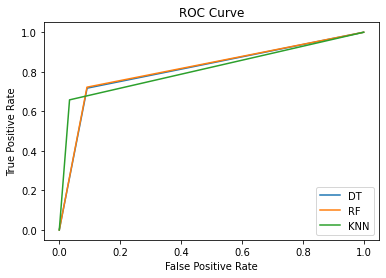

In [ ]:
import matplotlib.pyplot as plt
plt.plot(DT_fpr,DT_tpr,label="DT")
plt.plot(rf_fpr,rf_tpr,label="RF")
plt.plot(knn_fpr,knn_tpr,label="KNN")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()